In [ ]:
import os
import sys
# if you don't want the data to be downladed from kaggle assign the correct data path here
data_dir = None

if data_dir is not None:
    pass
elif os.path.isdir('/kaggle'):
    data_dir = 'data/'
    assert(os.path.isdir(data_dir))
else:
    script_dir = os.getcwd()
    data_dir = os.path.join(script_dir, 'sf-bay-area-bike-share')

if os.path.isdir(data_dir):
    print(f"Using existing data directory {data_dir}")
else:
    print(f"Data directory {data_dir} not found. Need to download from kaggle")
    if 'google.colab' in sys.modules and not os.path.isfile(os.path.expanduser('~/.kaggle/kaggle.json')):
        import google.colab
        print("Upload your kaggle.json")
        google.colab.files.upload()
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    try:
        import kaggle
    except:
        !pip install kaggle
    !kaggle datasets download -d benhamner/sf-bay-area-bike-share
    !mkdir -p "$data_dir"
    !unzip -d "$data_dir" sf-bay-area-bike-share.zip

if not os.path.isdir(data_dir):
    raise ValueError(f"Data directory {data_dir} still not found. Ensure correct kaggle setup.")
    
station_csv = os.path.join(data_dir, 'station.csv')
status_csv = os.path.join(data_dir, 'status.csv')
trip_csv = os.path.join(data_dir, 'trip.csv')
weather_csv = os.path.join(data_dir, 'weather.csv')





distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 2 to 84
Data columns (total 6 columns):
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 669959 entries, 4576 to 432947
Data columns (total 7 columns):
duration             669959 non-null uint32
start_date           669959 non-null datetime64[ns]
start_station_id     669959 non-null uint8
end_date             669959 non-null datetime64[ns]
end_station_id       669959 non-null uint8
bike_id              669959 non-null uint16
subscription_type    669959 non-null bool
dtypes: bool(1), datetime64[ns](2), uint16(1), uint32(1), uint8(2)
memory usage: 21.1 MB


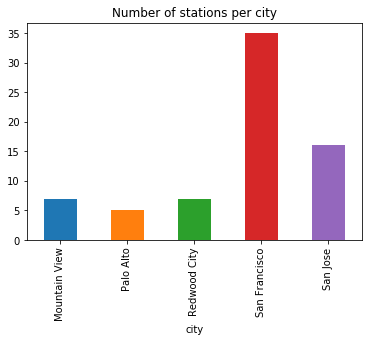

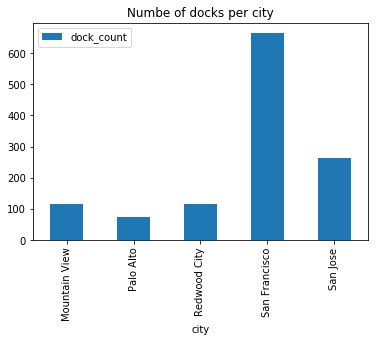

In [5]:
!pip install -q numpy pandas matplotlib folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins


station = pd.read_csv('bikeshare_data/station.csv', index_col='id', parse_dates=['installation_date'])
station.info()

trip = pd.read_csv('bikeshare_data/trip.csv',
                   index_col='id',
                   usecols=['id', 'duration', 'start_date', 'start_station_id', 'end_date', 'end_station_id', 'bike_id', 'subscription_type'],
                   parse_dates=['start_date', 'end_date'],
                   infer_datetime_format=True,
                   dtype={'duration': np.uint32, 'start_station_id': np.uint8, 'end_station_id': np.uint8, 'bike_id': np.uint16},
                   true_values=['Subscriber'],
                   false_values=['Customer'],
                   )
trip.info()


station.head()

station.dock_count.describe()

station.dock_count.hist(bins=18)

(station.installation_date.min(), 
 station.installation_date.max(), 
 station.installation_date.max() - station.installation_date.min())

#station.installation_date.hist(bins=24, xrot=90);

station.groupby('city').size().plot.bar(title="Number of stations per city");

station.groupby('city').agg({'dock_count': 'sum'}).plot.bar(title="Numbe of docks per city");

station_hm = station.loc[:, ['lat', 'long']].copy()
station_hm.loc[:, 'dock_count_norm'] = (station.dock_count - station.dock_count.min()) / (station.dock_count.max() - station.dock_count.min())

station_map = folium.Map(location=[station.lat.mean(), station.long.mean()], zoom_start=10)
folium.plugins.HeatMap(station_hm.values.tolist()).add_to(station_map)
#station_map.save(os.path.join(data_dir, 'station_map.html'))
station_map
